Basic Info:
(928, 4)
['image_id', 'noisy', 'abstract', 'paint']
shape: (5, 4)
┌──────────┬───────┬──────────┬───────┐
│ image_id ┆ noisy ┆ abstract ┆ paint │
│ ---      ┆ ---   ┆ ---      ┆ ---   │
│ i64      ┆ i64   ┆ i64      ┆ i64   │
╞══════════╪═══════╪══════════╪═══════╡
│ 12696    ┆ 4     ┆ 3        ┆ 4     │
│ 13821    ┆ 5     ┆ 2        ┆ 3     │
│ 2616     ┆ 4     ┆ 2        ┆ 2     │
│ 7634     ┆ 3     ┆ 1        ┆ 1     │
│ 7363     ┆ 3     ┆ 1        ┆ 1     │
└──────────┴───────┴──────────┴───────┘

Missing Values:
{'image_id': 0, 'noisy': 0, 'abstract': 0, 'paint': 0}


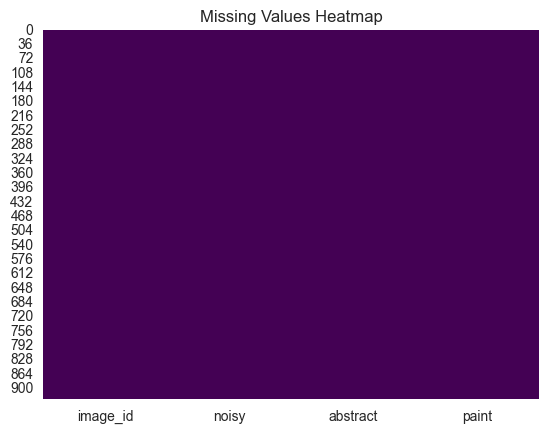


Column Types:
[Int64, Int64, Int64, Int64]

paint Class Distribution:
shape: (5, 2)
┌───────┬───────┐
│ paint ┆ count │
│ ---   ┆ ---   │
│ i64   ┆ u32   │
╞═══════╪═══════╡
│ 1     ┆ 355   │
│ 2     ┆ 289   │
│ 4     ┆ 82    │
│ 3     ┆ 156   │
│ 5     ┆ 46    │
└───────┴───────┘


/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_3598/1049944074.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.to_pandas(), x=column_name, palette="viridis")


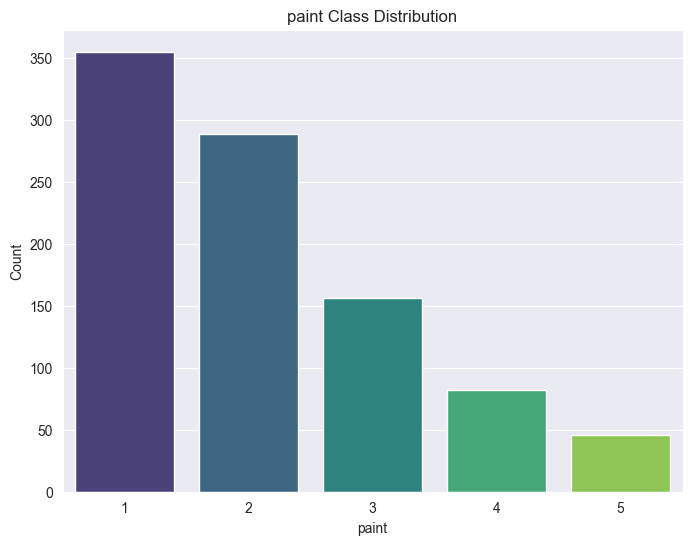

Numeric Columns: ['image_id', 'noisy', 'abstract', 'paint']
Correlation DataFrame:
          image_id     noisy  abstract     paint
image_id  1.000000  0.158115  0.016904  0.152497
noisy     0.158115  1.000000  0.324802  0.328930
abstract  0.016904  0.324802  1.000000  0.378685
paint     0.152497  0.328930  0.378685  1.000000


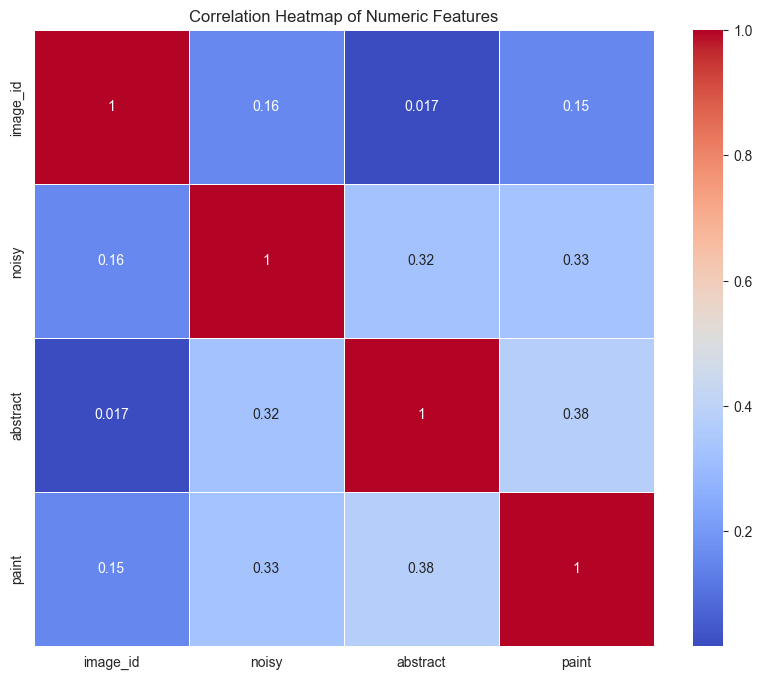

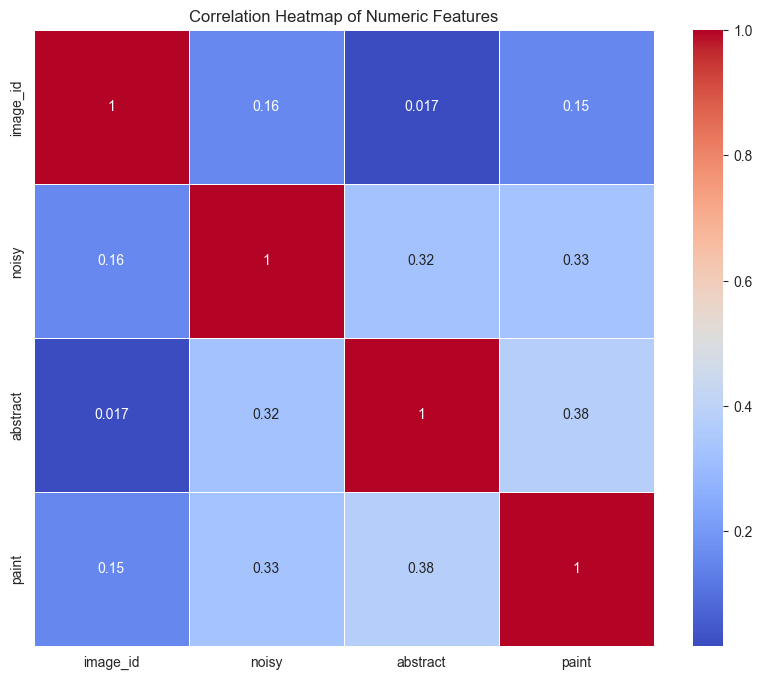

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_3598/1049944074.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.to_pandas(), x=column_name, y=col, palette="viridis")


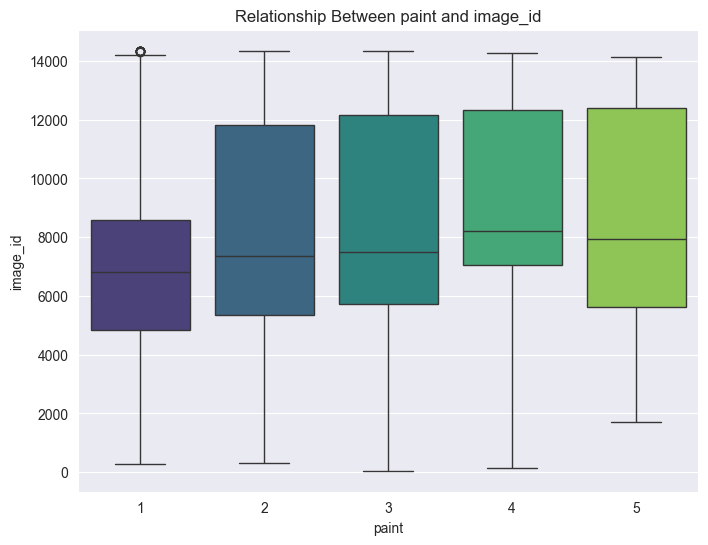

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_3598/1049944074.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.to_pandas(), x=column_name, y=col, palette="viridis")


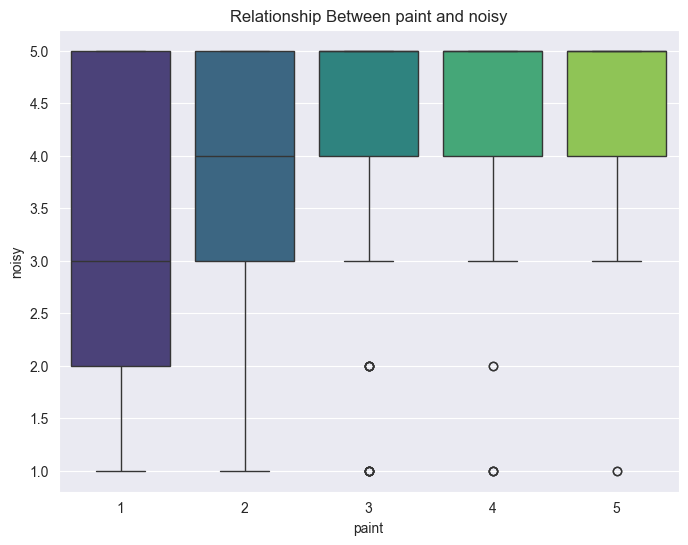

/var/folders/tw/t4_6l2cn5hz3hqm6tjzgwk5c0000gn/T/ipykernel_3598/1049944074.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.to_pandas(), x=column_name, y=col, palette="viridis")


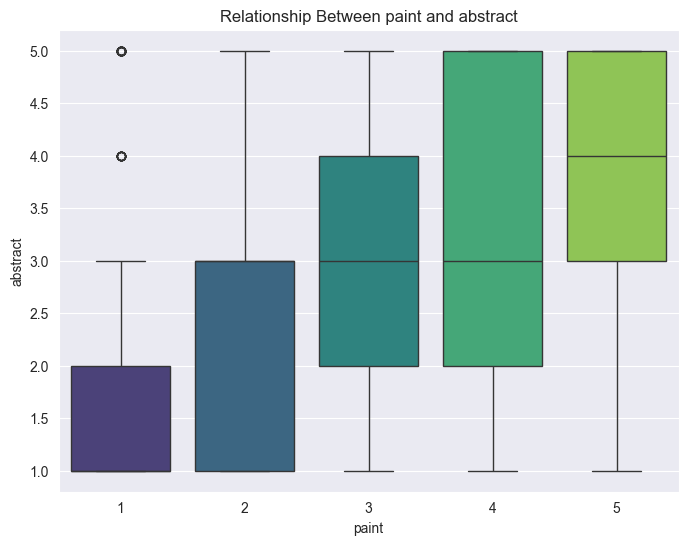

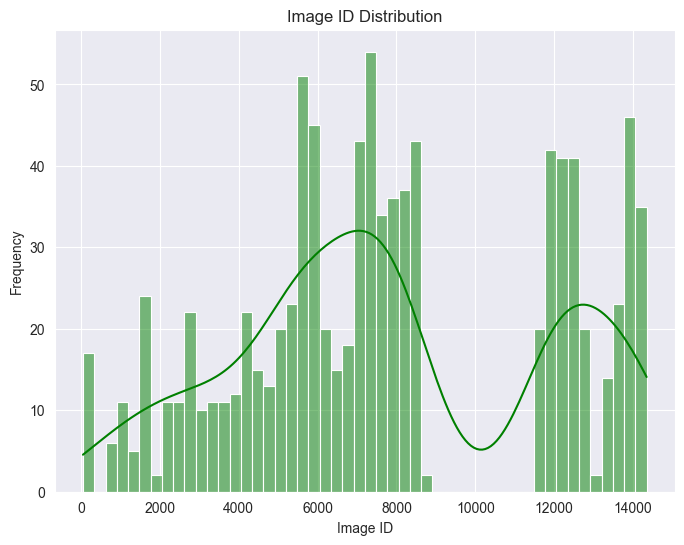


General Insights:
Number of unique values in paint: 5
Column paint value counts: shape: (5, 2)
┌───────┬───────┐
│ paint ┆ count │
│ ---   ┆ ---   │
│ i64   ┆ u32   │
╞═══════╪═══════╡
│ 2     ┆ 289   │
│ 1     ┆ 355   │
│ 4     ┆ 82    │
│ 5     ┆ 46    │
│ 3     ┆ 156   │
└───────┴───────┘


In [12]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Path to your CSV
csv_path = '/Users/yuda/PycharmProjects/matching_arts_v3/data/eli_votes.csv'
column_name = ['noisy', 'abstract', 'paint'][2]  # Change this based on your choice

# Load data
df = pl.read_csv(csv_path)
df = df.filter(
    (pl.col("filled") == True)
)

df = df.drop("filled")
df = df.drop("id")


# Display basic info about the dataframe
print("Basic Info:")
print(df.shape)  # (rows, cols)
print(df.columns)  # column names
print(df.head())

# Check for missing values in the dataset
print("\nMissing Values:")
missing_values = {col: df[col].is_null().sum() for col in df.columns}
print(missing_values)

# Visualizing missing values (optional: with seaborn heatmap)
missing_values_df = {col: df[col].is_null().to_pandas() for col in df.columns}
sns.heatmap(np.array(list(missing_values_df.values())).T, cbar=False, cmap='viridis', xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()

# Check column types
print("\nColumn Types:")
print(df.dtypes)

# Let's look at the distribution of the target column 'noisy', 'abstract', or 'paint'
print(f"\n{column_name} Class Distribution:")
class_dist = df[column_name].value_counts()
print(class_dist)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df.to_pandas(), x=column_name, palette="viridis")
plt.title(f"{column_name} Class Distribution")
plt.xlabel(column_name)
plt.ylabel("Count")
plt.show()

# Let's also look at the distribution of numeric columns
# Select all numeric columns (adjusted method)
numeric_cols = df.select([pl.col(c) for c in df.columns if df[c].dtype in [pl.Float64, pl.Int64, pl.UInt64]]).columns

# Check if numeric columns exist
print(f"Numeric Columns: {numeric_cols}")

if numeric_cols:
    # Create a correlation matrix for numeric columns
    corr_df = df.select(numeric_cols).to_pandas().corr()
    print("Correlation DataFrame:")
    print(corr_df)

    # Plot the heatmap if correlation data exists
    if not corr_df.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap of Numeric Features")
        plt.show()
    else:
        print("No valid correlation data to plot.")
else:
    print("No numeric columns found.")

# Correlation Heatmap of Numeric Features (optional)
# Create a correlation matrix for numeric columns
corr_df = df.select(numeric_cols).to_pandas().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Explore relationships between target and other features
# Scatter plot example between 'noisy' and other numeric columns (e.g., 'abstract', 'paint')
numeric_cols.remove(column_name)  # Exclude target column for scatter plots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df.to_pandas(), x=column_name, y=col, palette="viridis")
    plt.title(f"Relationship Between {column_name} and {col}")
    plt.show()

# Visualizing image_id distribution (Optional)
plt.figure(figsize=(8, 6))
sns.histplot(df['image_id'].to_pandas(), kde=True, color='green', bins=50)
plt.title("Image ID Distribution")
plt.xlabel("Image ID")
plt.ylabel("Frequency")
plt.show()

# Insights
print("\nGeneral Insights:")
print(f"Number of unique values in {column_name}: {df[column_name].n_unique()}")
print(f"Column {column_name} value counts: {df[column_name].value_counts()}")
